## Import required package

In [1]:
import keyword
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math as ma

## Importing dataset

In [2]:
iris=pd.read_csv('Iris.csv')

## checkinf for null values if any#

In [3]:
iris.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


## describing statistical values

In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data Visualization

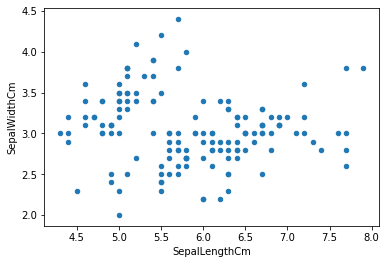

In [6]:
iris.plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm")

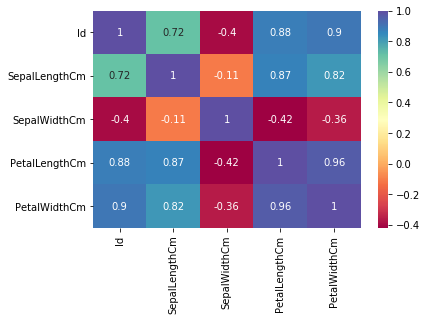

In [7]:
sns.heatmap(iris.corr(),annot=True,cmap="Spectral")
plt.show()

C:\Users\Nirmal\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


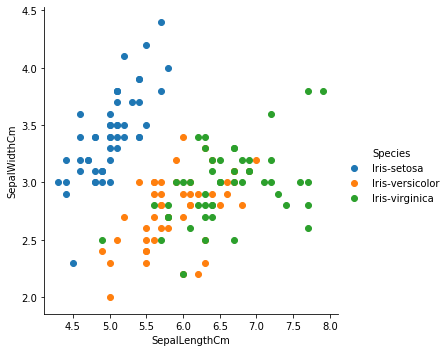

In [8]:
sns.FacetGrid(iris,hue="Species", size=5)\
 .map(plt.scatter,"SepalLengthCm","SepalWidthCm")\
 .add_legend()

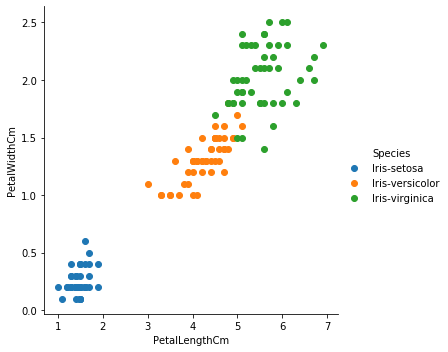

In [9]:
sns.FacetGrid(iris,hue="Species", size=5)\
 .map(plt.scatter,"PetalLengthCm","PetalWidthCm")\
 .add_legend()

<function matplotlib.pyplot.show(*args, **kw)>

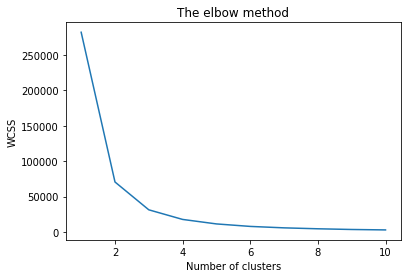

In [10]:
x=iris.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
WCSS=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',
                 max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(1, 11), WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #Within cluster sum of square
plt.show

In [11]:
kmeans = KMeans(n_clusters = i, init = 'k-means++',
                max_iter = 300, n_init = 10,random_state = 0)
y_kmeans=kmeans.fit_predict(x)

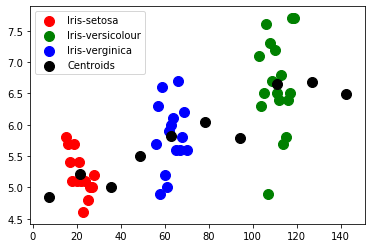

In [12]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s=100, c = 'red', label = "Iris-setosa")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s=100, c = 'green', label = "Iris-versicolour")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s=100, c = 'blue', label = "Iris-verginica")
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=100,c = 'black', label = 'Centroids')
plt.legend()